### Library Importing

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

import torch

### Loading the Dataset

In [15]:
df = pd.read_csv('heart.csv')

### Exploratory Data Analysis

In [16]:
# Checking the first few rows of the dataset
print (df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [17]:
# Checking the dataset dimension
print ("Dataset Shape :", df.shape)

Dataset Shape : (1025, 14)


In [18]:
# Checking the data types of each column
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [19]:
# Missing value checking
print("Missing Values : \n", data.isnull().sum())

Missing Values : 
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
# Summarizing the statistics
print("Summary statistics : \n", data.describe())

Summary statistics : 
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     

In [21]:
cats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
nums = ['age', 'trestbps', 'chol', 'thalach']

### Categorical Variables & Ratios Showed in Pie Charts

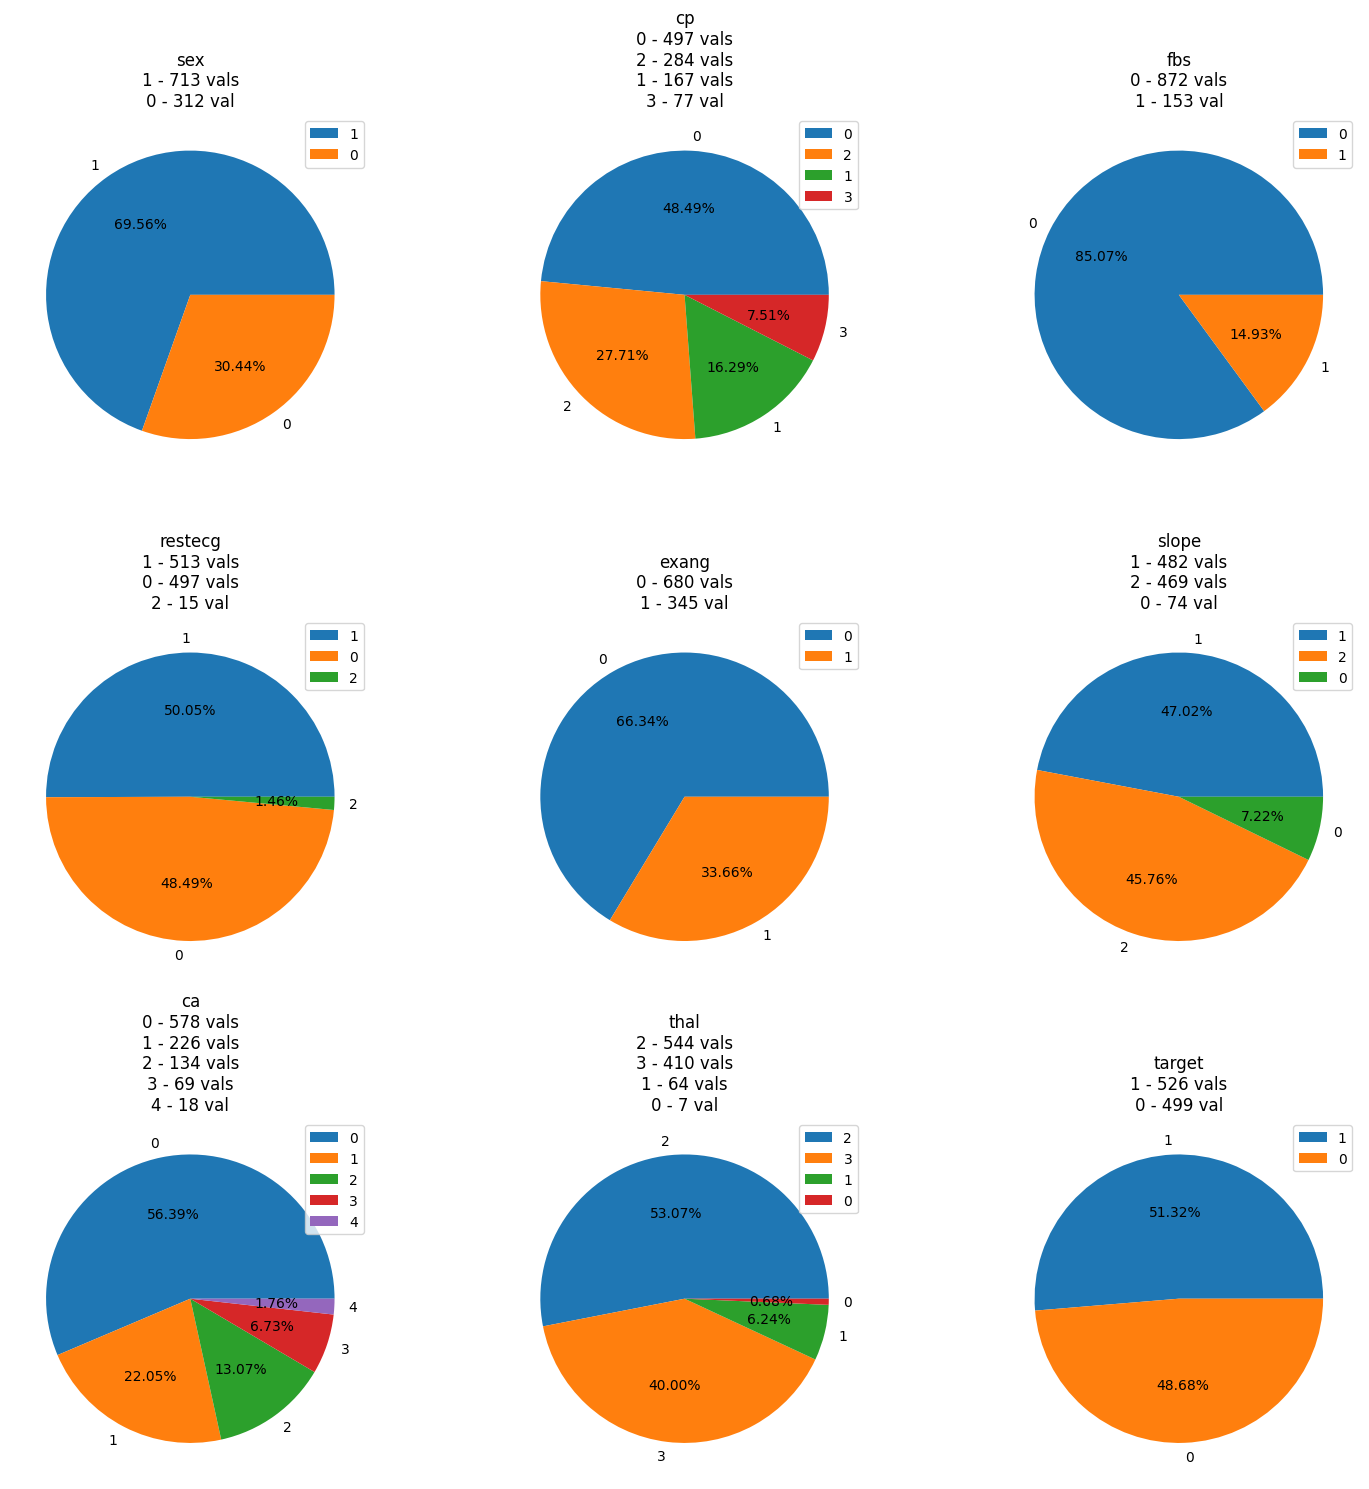

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
k = 0
for i in range(3):
    for j in range(3):
        freqs = df[cats[k]].value_counts()
        axes[i][j].pie(freqs, labels=freqs.index, autopct='%0.2f%%')
        axes[i][j].legend(freqs.index, loc='best')
        title = "{}\n".format(cats[k])
        for p, l in zip(freqs.index, freqs):
            title += "{} - {} vals\n".format(p, l)
        title = title[:-2]
        axes[i][j].set_title(title)
        k += 1
        
plt.tight_layout()   
plt.show()

In [33]:
def pairplot_hue_combined(df, hue1, hue2, _vars):
    temp_df = df.copy()
    temp_df['{}_{}'.format(hue1, hue2)] = temp_df[hue1].astype(str) + ' ' + temp_df[hue2].astype(str)
    sns.pairplot(temp_df, vars=_vars, hue='{}_{}'.format(hue1, hue2))
    plt.show()
    freqs = temp_df['{}_{}'.format(hue1, hue2)].value_counts()
    plt.pie(freqs, labels=freqs.index, autopct='%0.2f%%')
    plt.show()

### Relationship of Test Results Between Patients With and Without Heart Disease

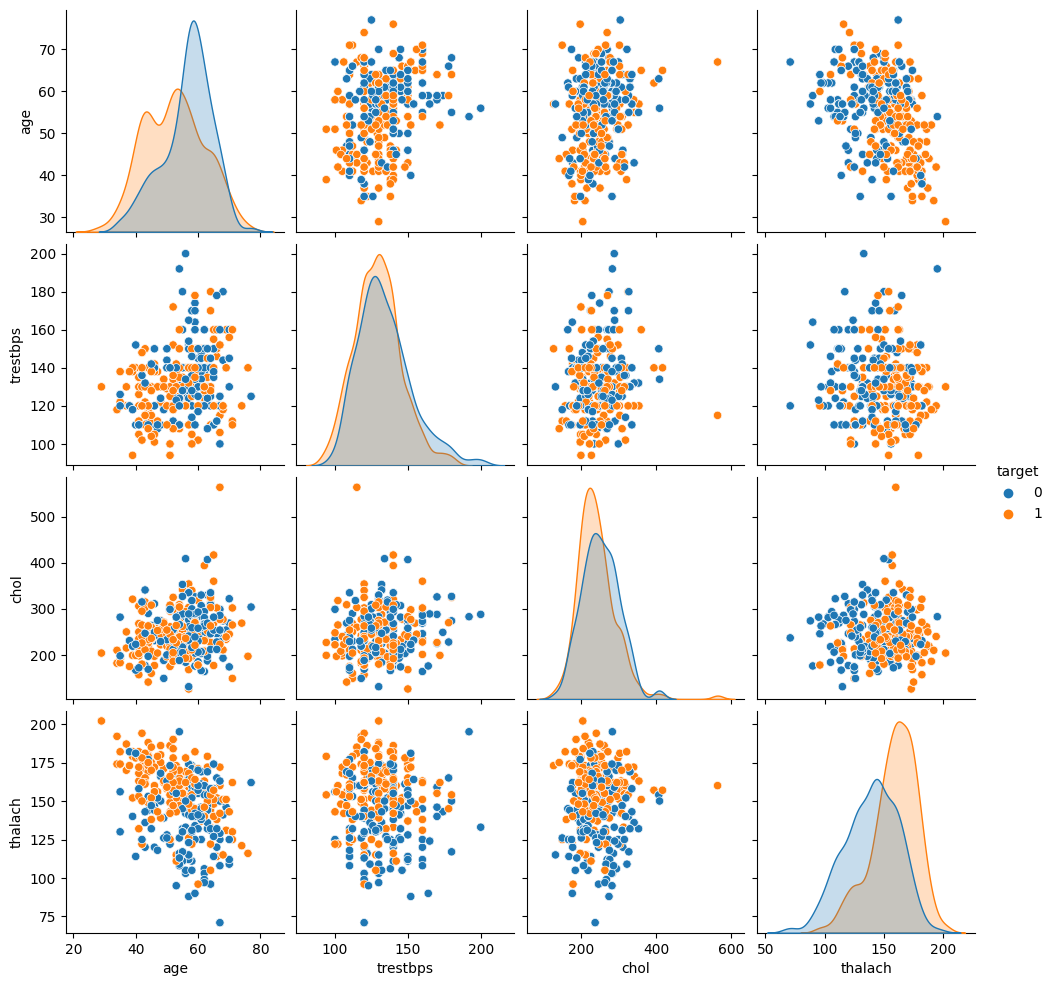

In [23]:
sns.pairplot(df, vars=nums, hue='target')
plt.show()

### Relationship Between Age, Gender, Test Results and How They Influence the Heart Disease
###### There are 2 classes combined :
###### 1 - Male; 0 - does not have heart disease
###### 0 - Female; 0 - does not have heart disease
###### 0 - Female; 1 - has heart disease
###### 1 - Male; 1 - has heart disease

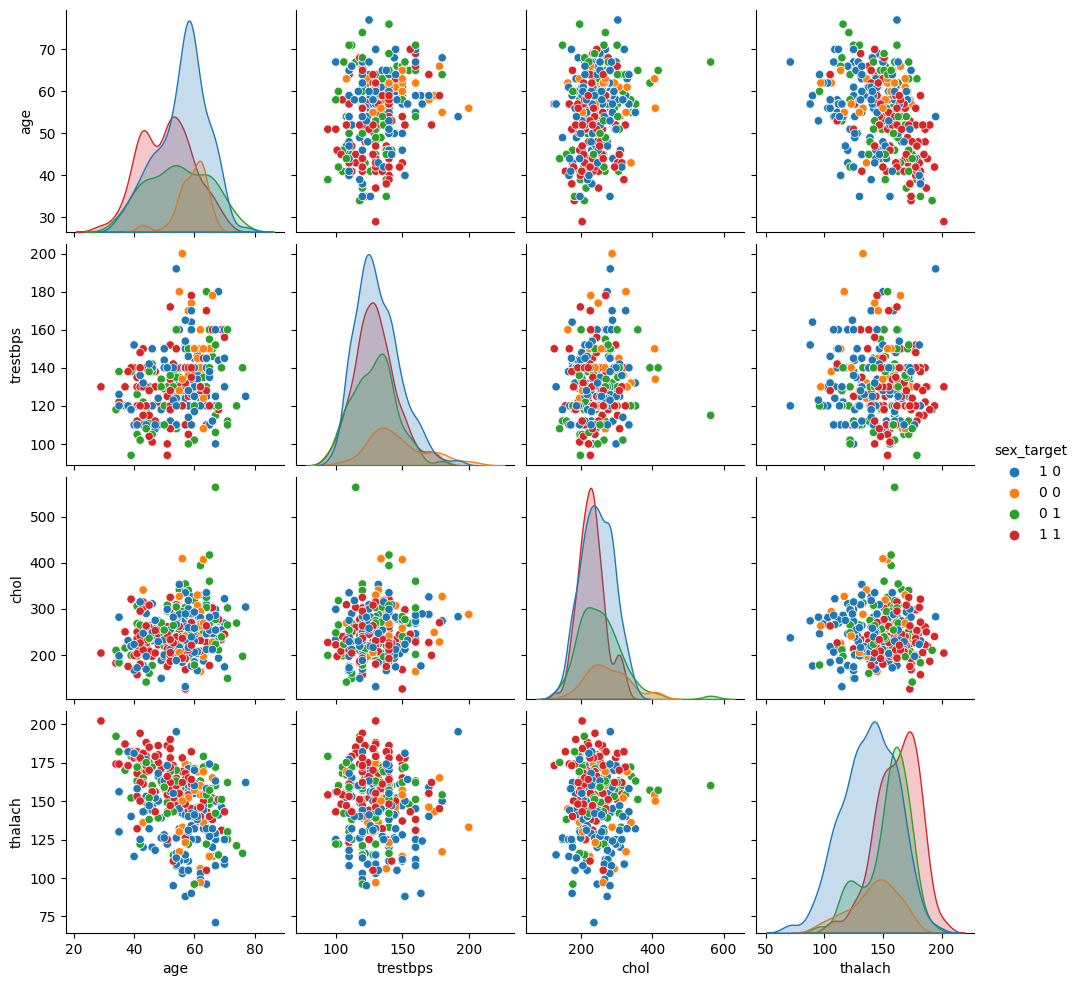

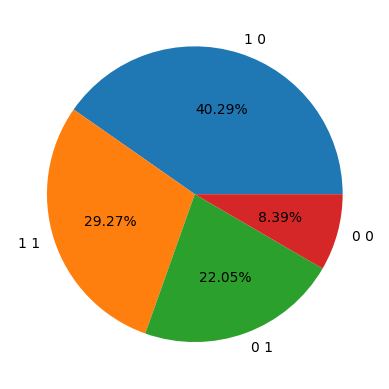

In [34]:
pairplot_hue_combined(df, 'sex', 'target', nums)

### Relationship Between Age, Chest Pain, Test Results and How it Influences the Patients' Heart Problem
###### Two classes are combined :
###### 0 - Chest Pain of type 1; 0 - no heart disease
###### 0 - Chest Pain of type 1; 1 - heart disease
###### 1 - Chest Pain of type 2; 1 - heart disease
###### 2 - Chest Pain of type 3; 1 - heart disease
###### 2 - Chest Pain of type 3; 0 - no heart disease
###### 1 - Chest Pain of type 2; 0 - no heart disease
###### 3 - Chest Pain of type 4; 1 - heart disease
###### 3 - Chest Pain of type 4; 0 - no heart disease

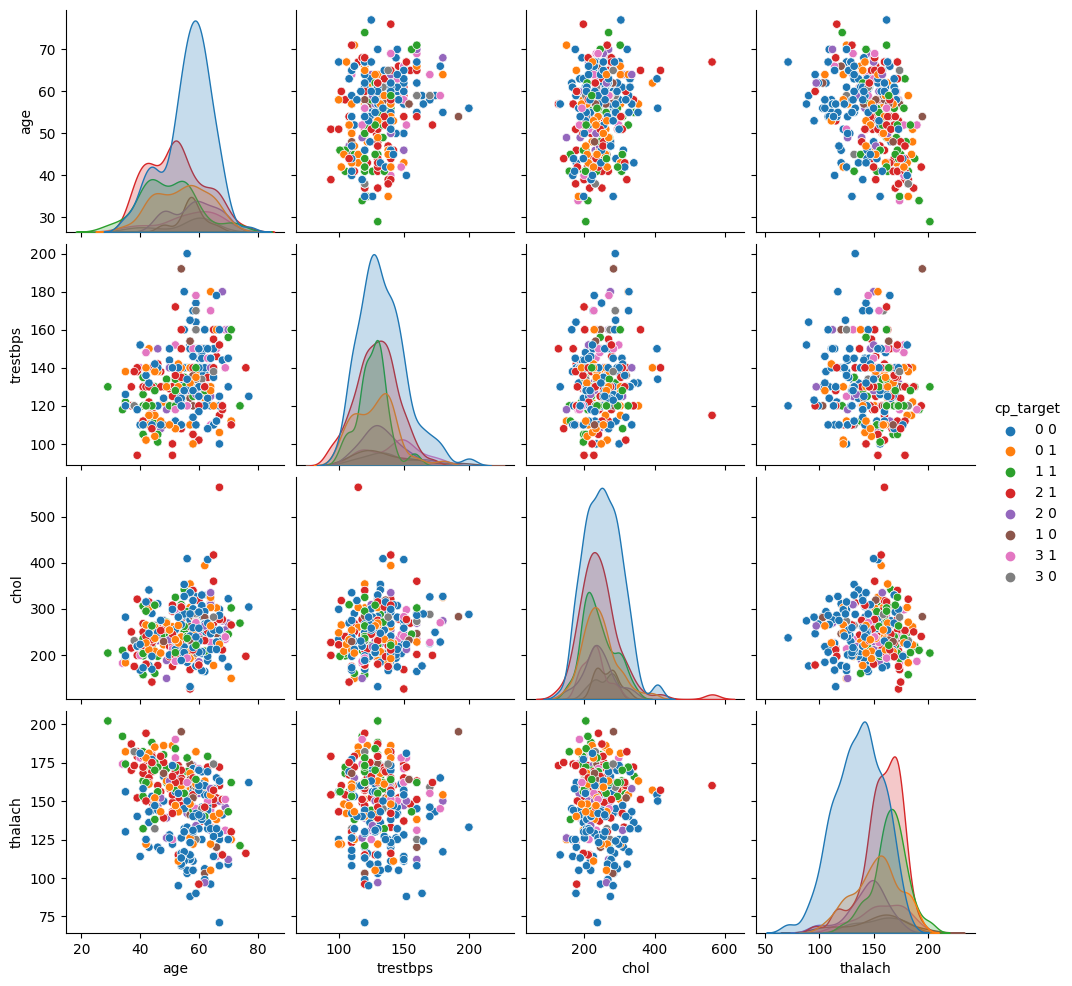

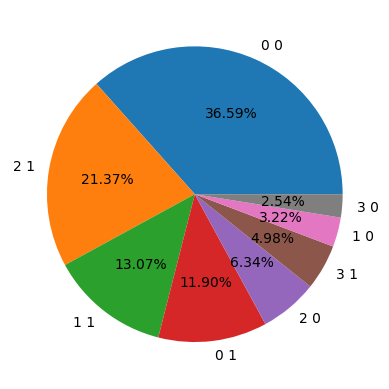

In [35]:
pairplot_hue_combined(df, 'cp', 'target', nums)

### Relationship Between Numerical Variables & Data Distribution Showed by Histplots, Barplots, and Boxplots

In [36]:
def plots_num_cat(df, x, y):
    fig, axes = plt.subplots(nrows=3, ncols=len(x), figsize=(15, 11))
    groped = df.groupby(y)
    for i in range(len(x)):
        sns.histplot(df, x=x[i], hue=y, ax=axes[0][i], kde=True)
        means = groped[x[i]].mean()
        sns.barplot(x=means.index, y=means, ax=axes[1][i])
        for container in axes[1][i].containers:
            axes[1][i].bar_label(container, size=12)
            
        sns.boxplot(x=df[y], y=df[x[i]], ax=axes[2][i])
        
    plt.suptitle("Values distributed by {}".format(y), size=20)
        
    plt.tight_layout()
    plt.show()

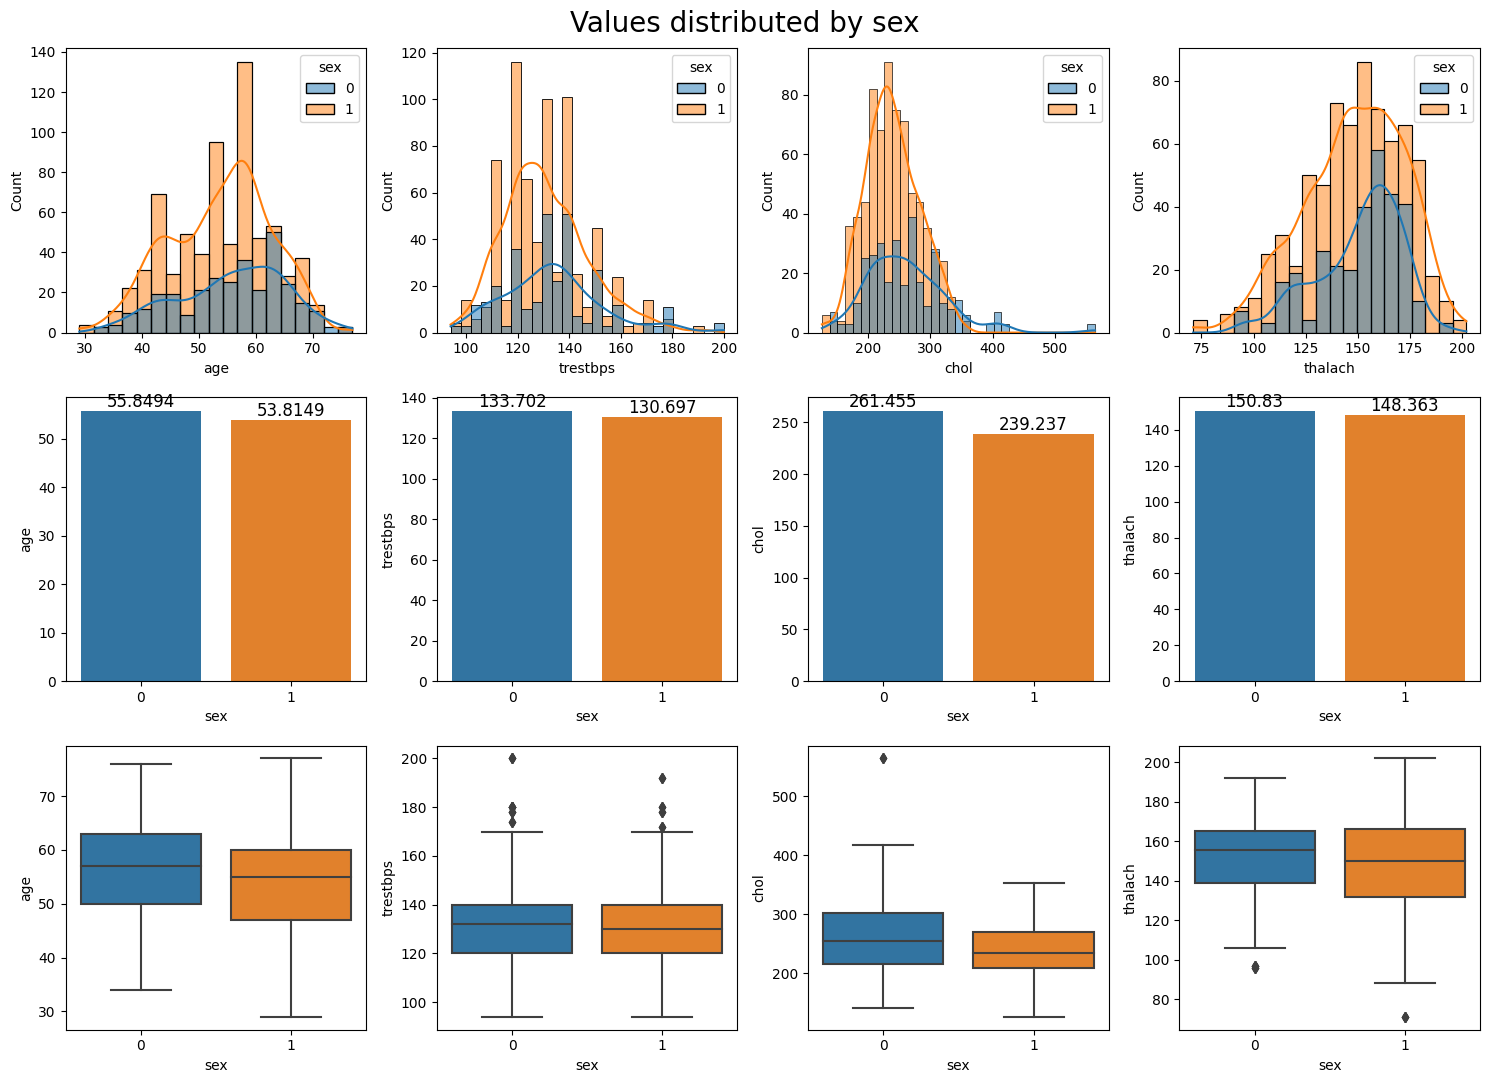

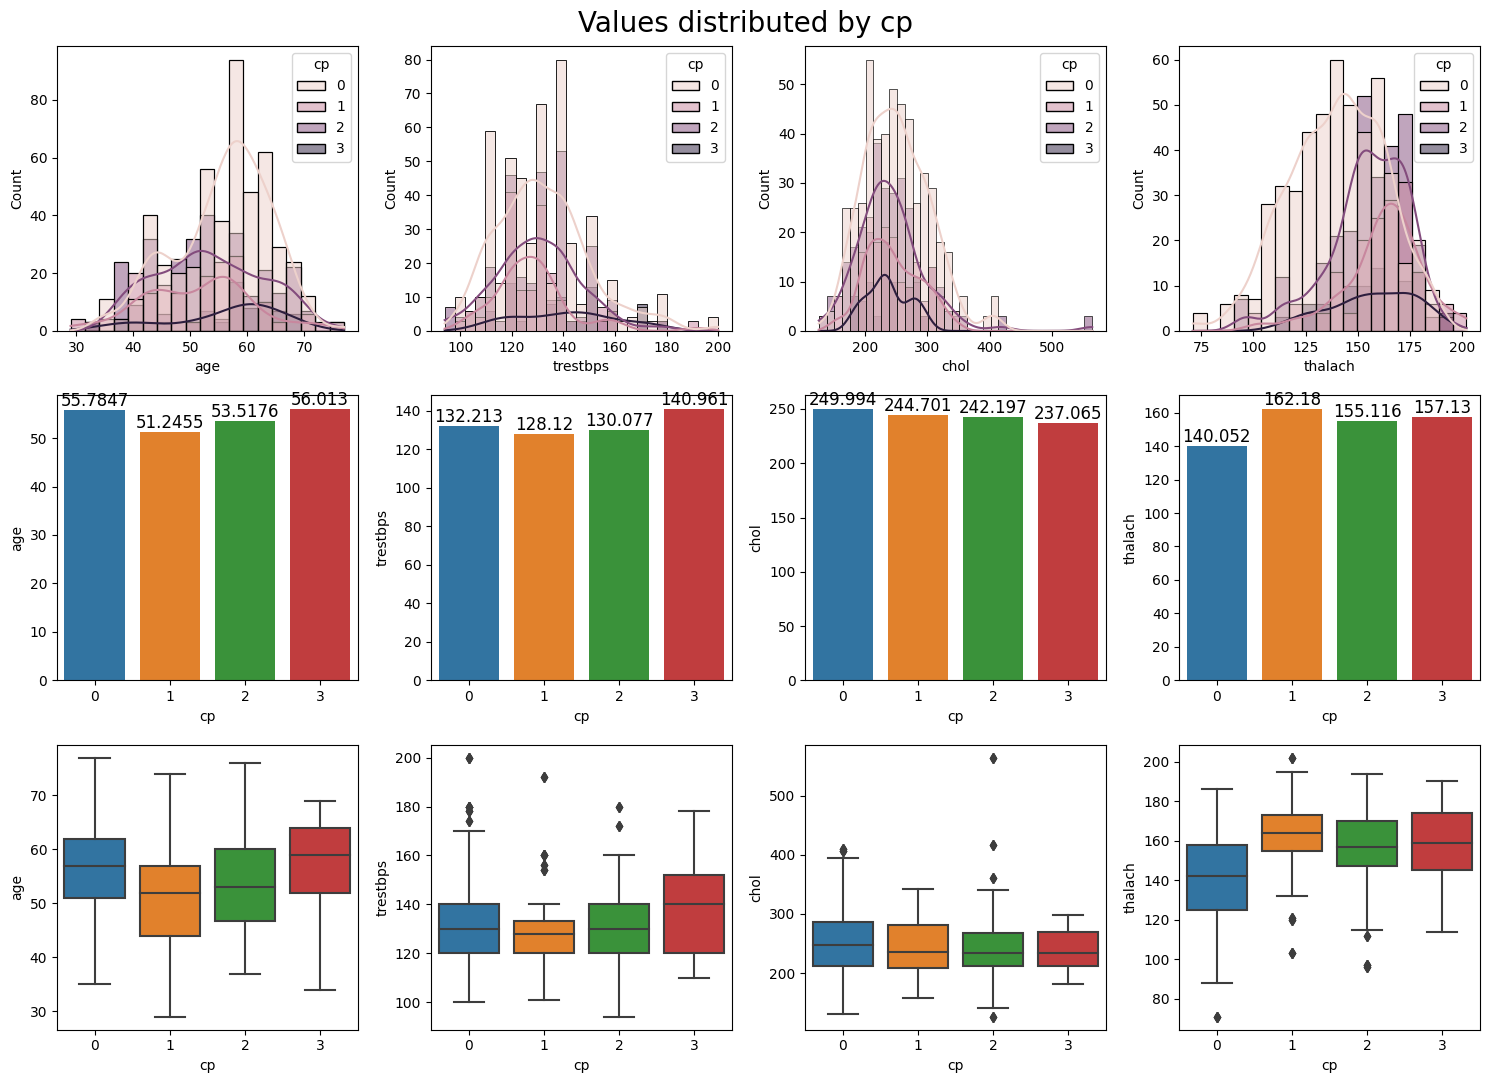

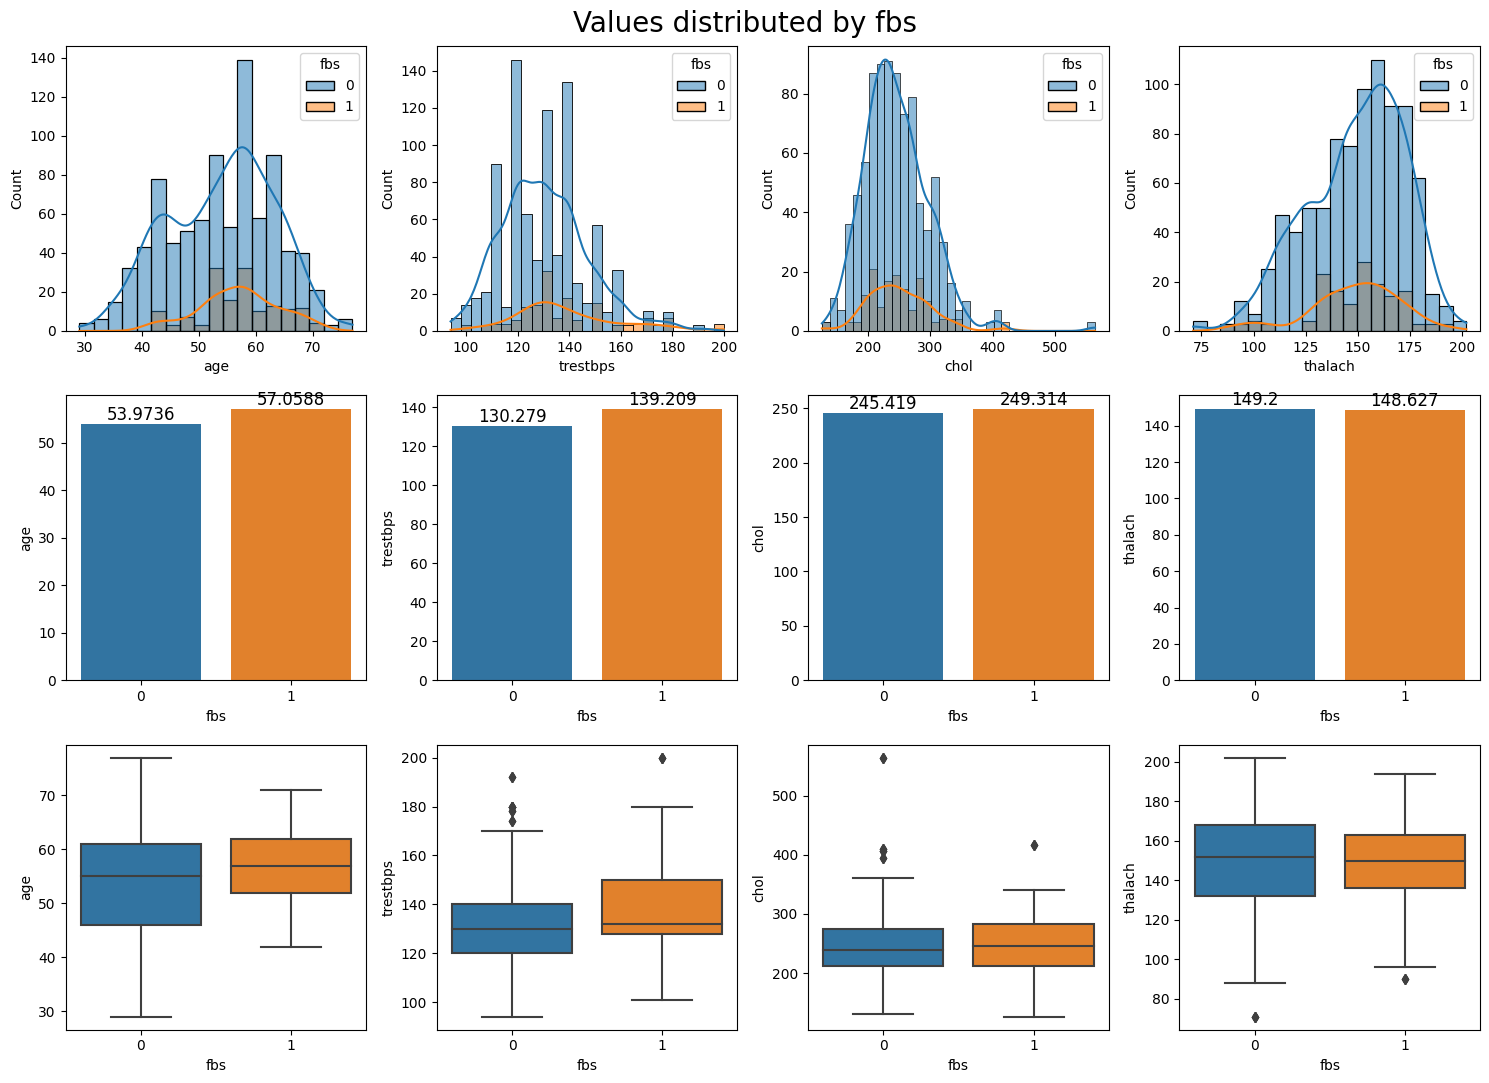

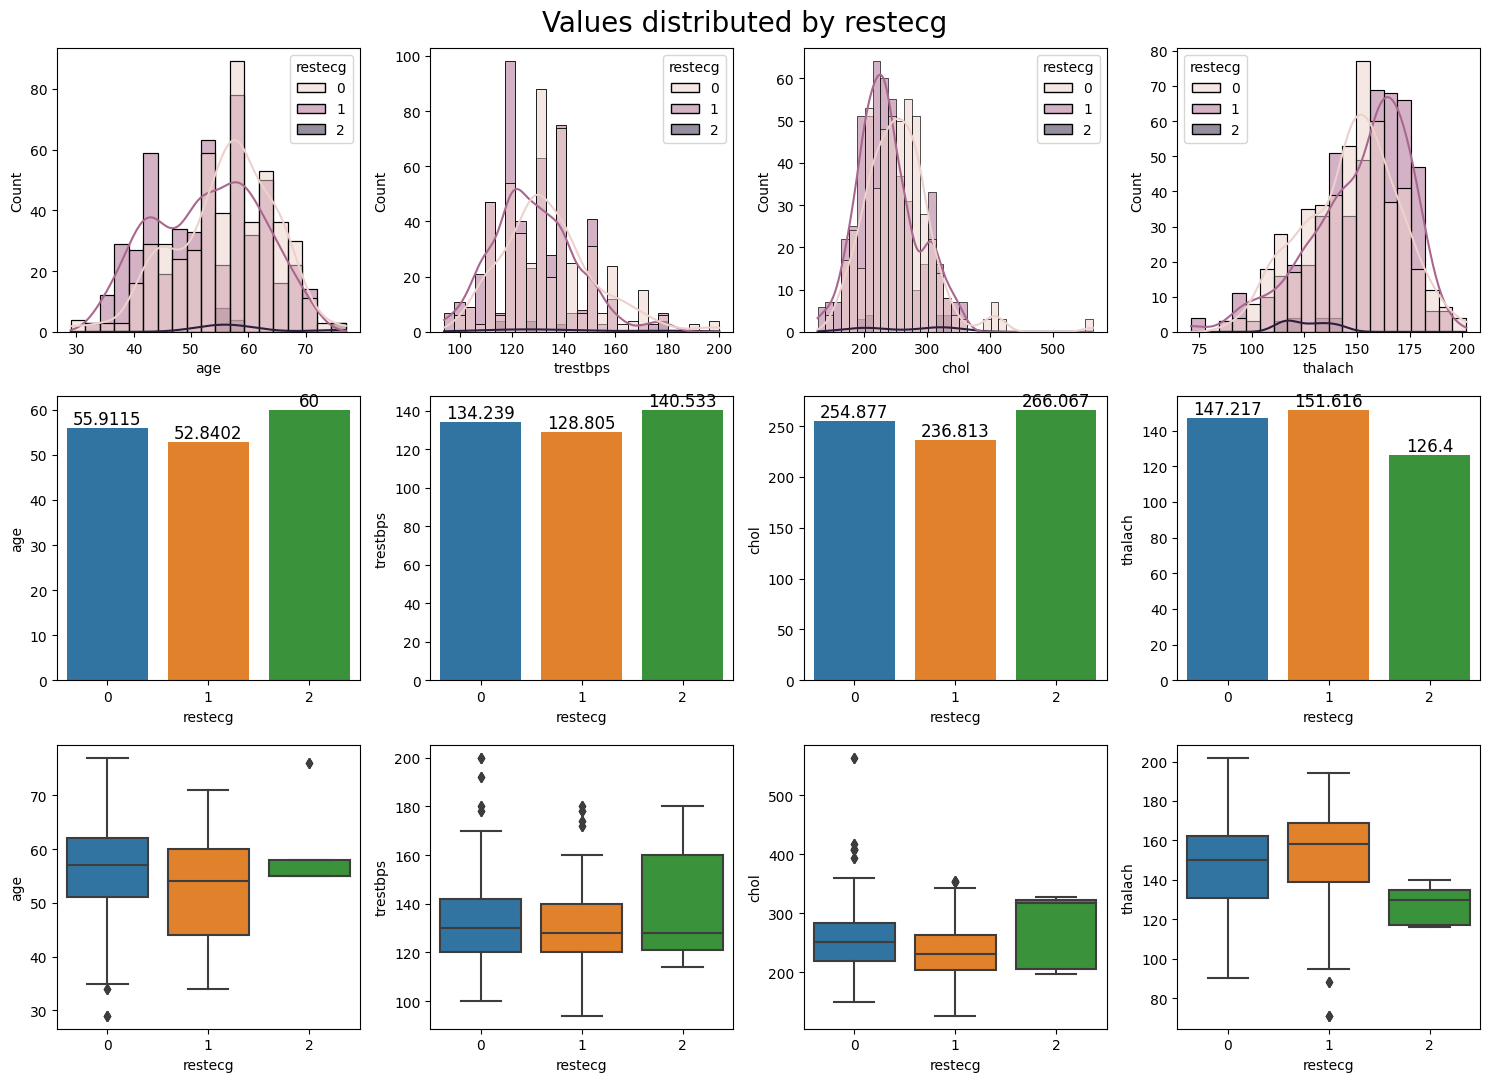

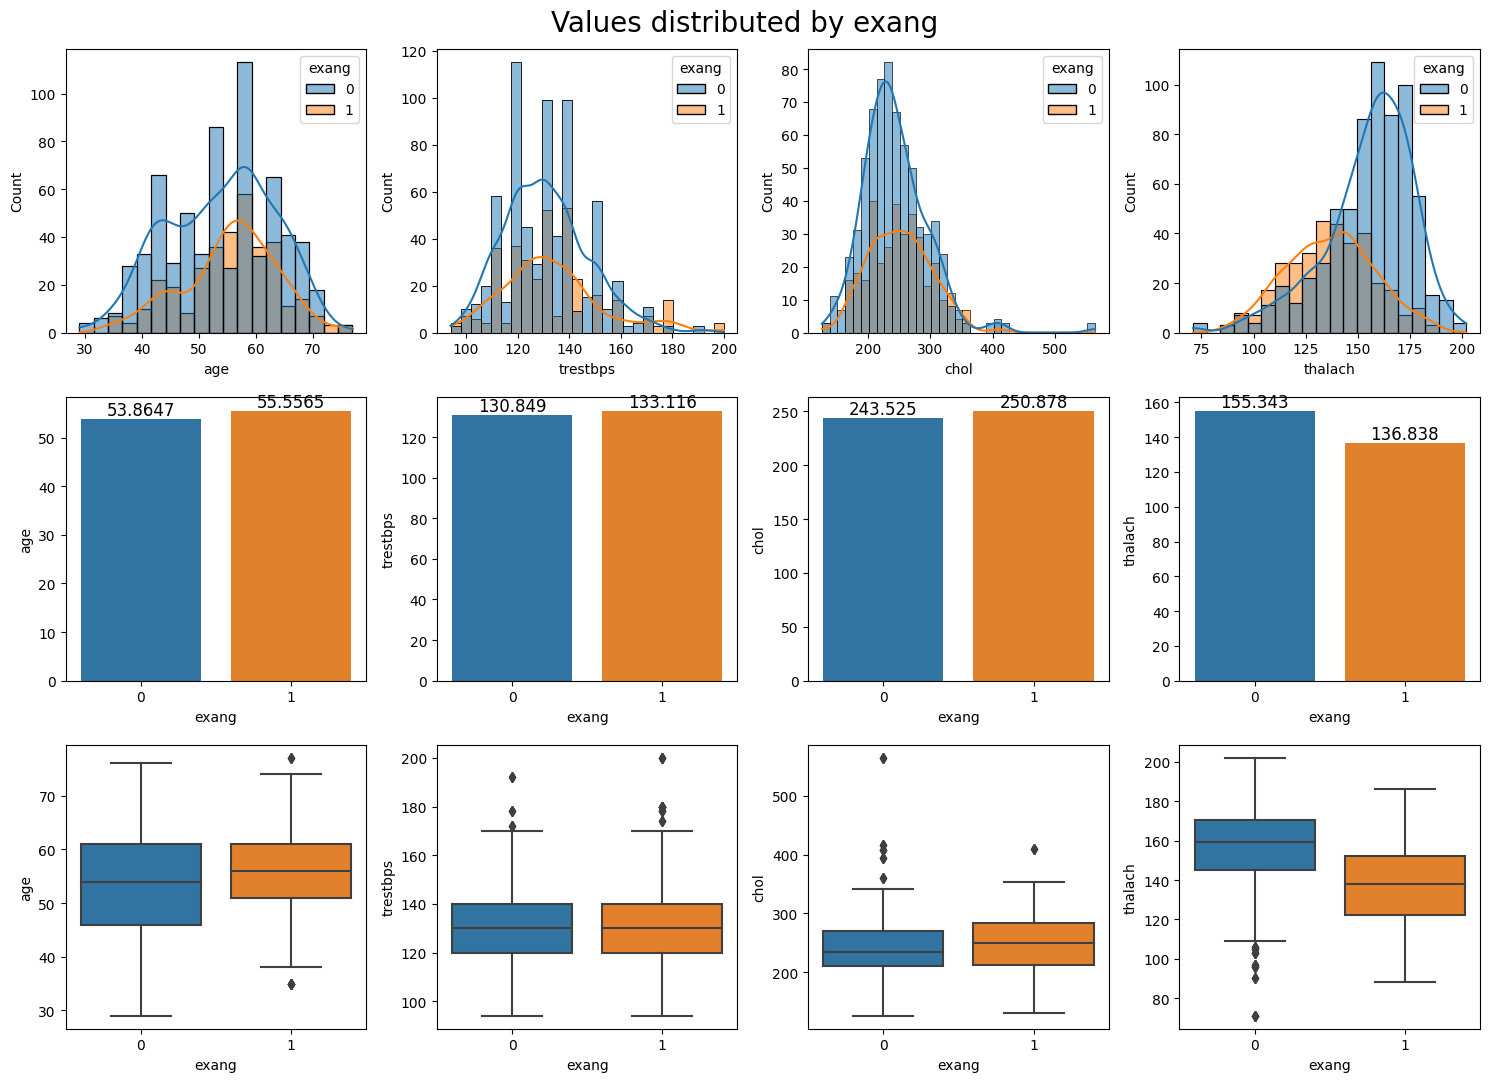

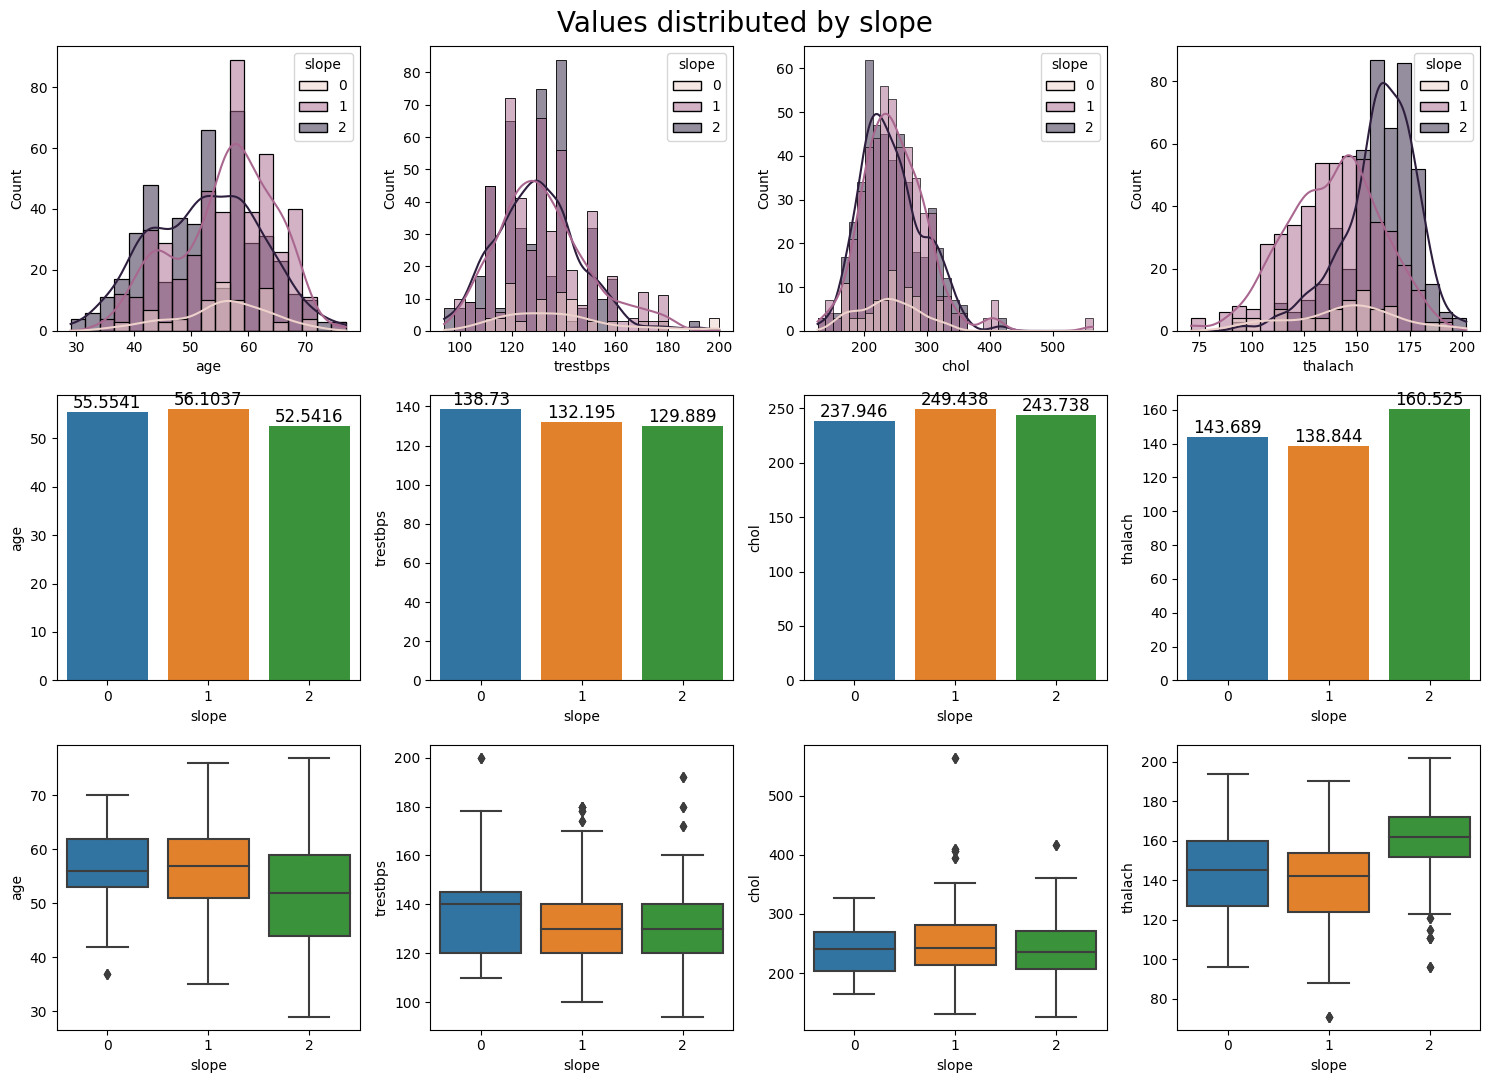

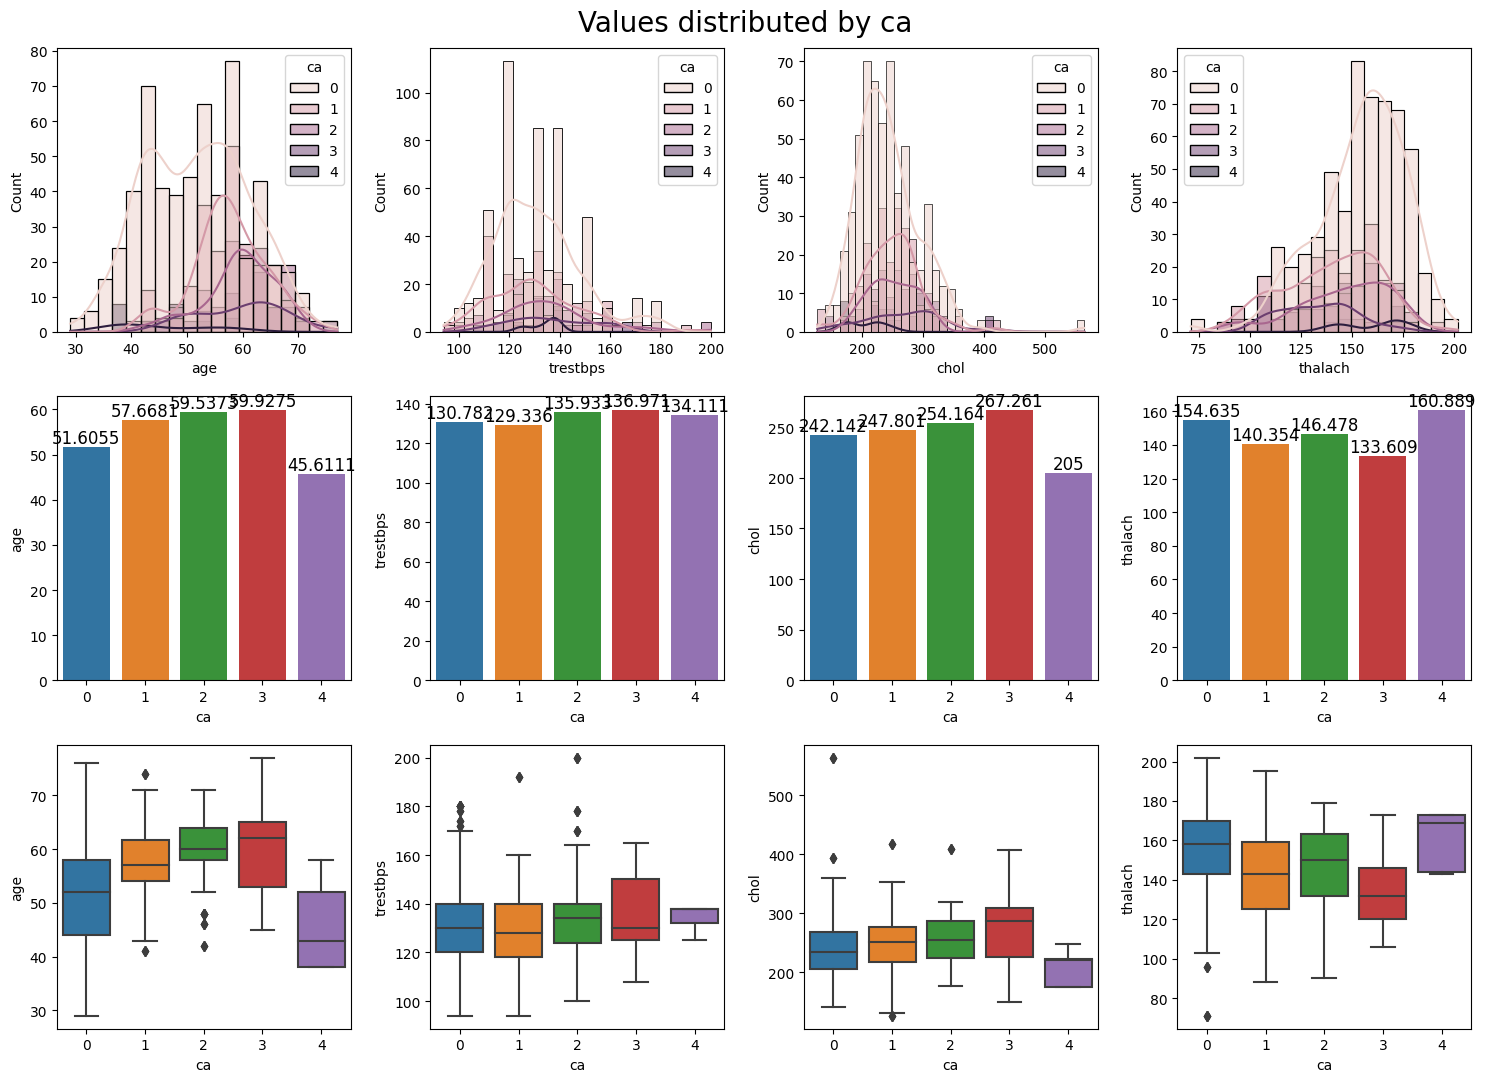

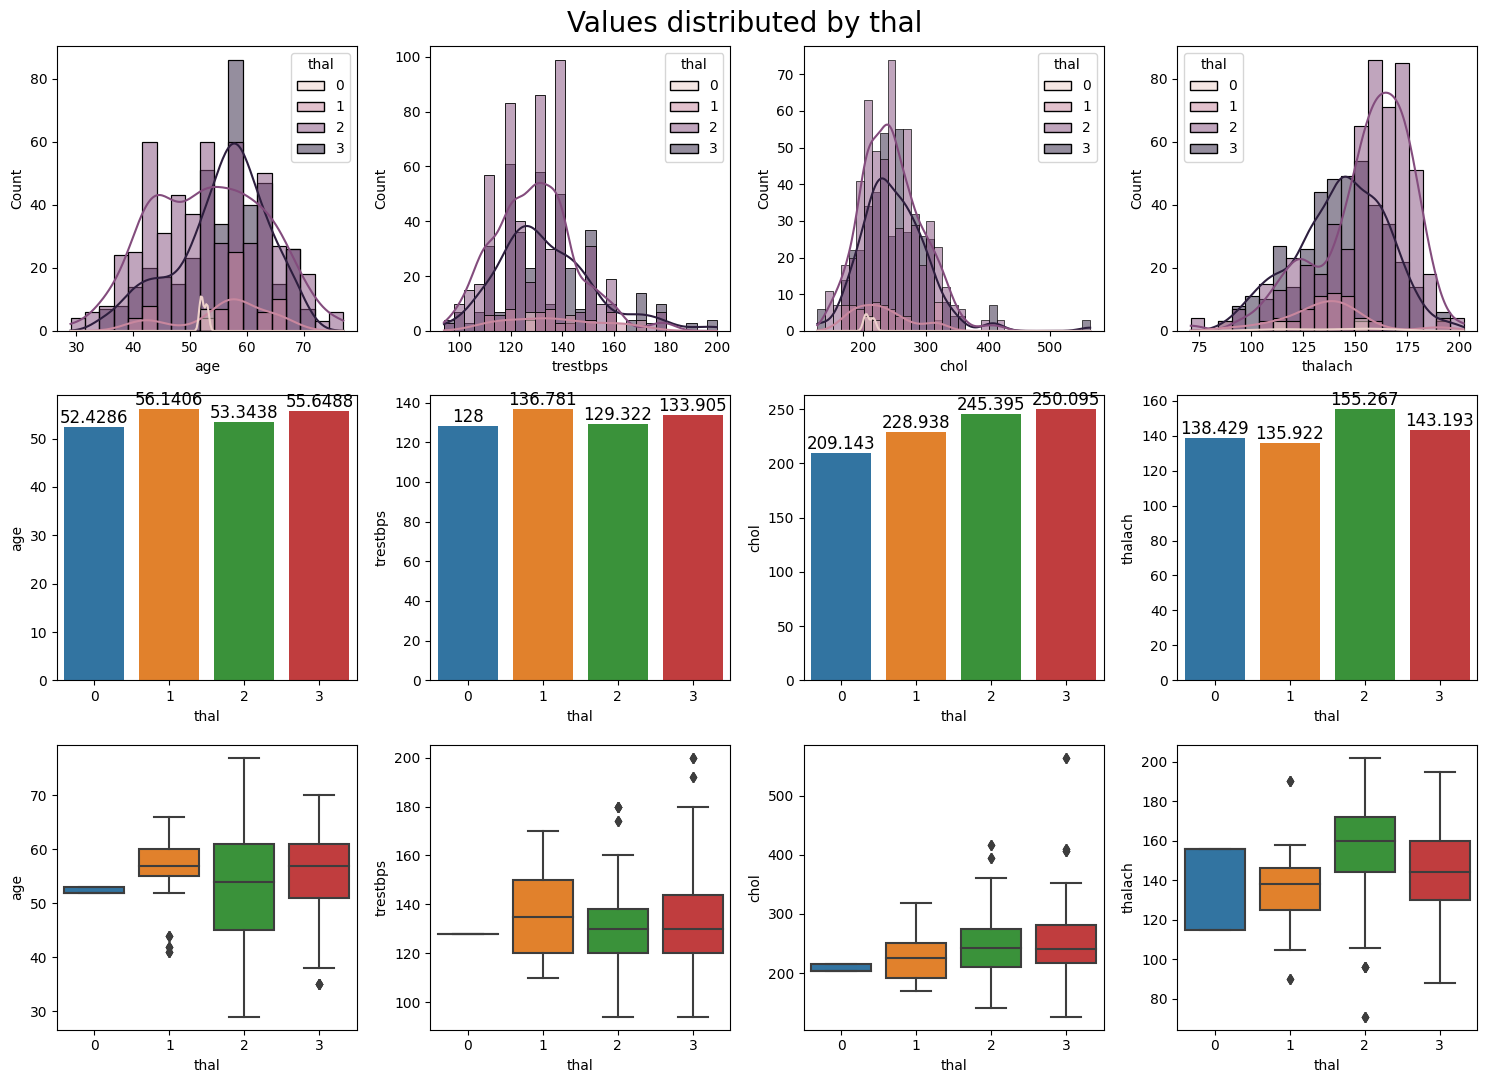

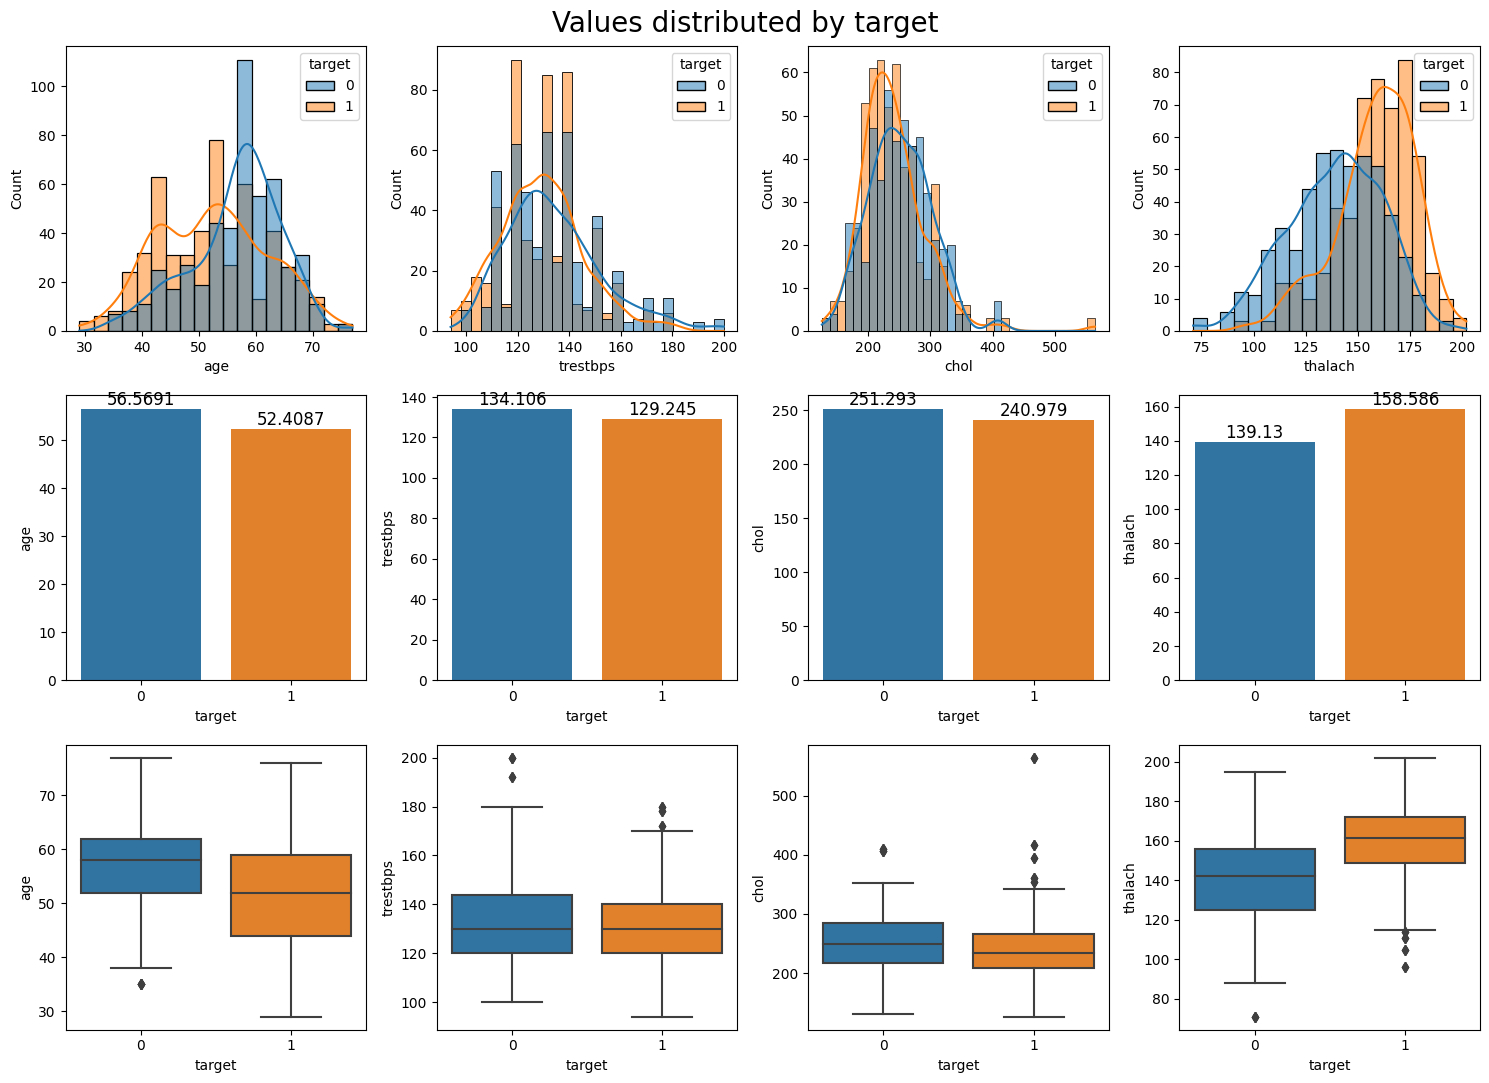

In [37]:
for i in cats:
    plots_num_cat(df, nums, i)

### Heatmap
###### This is used to see the correlations

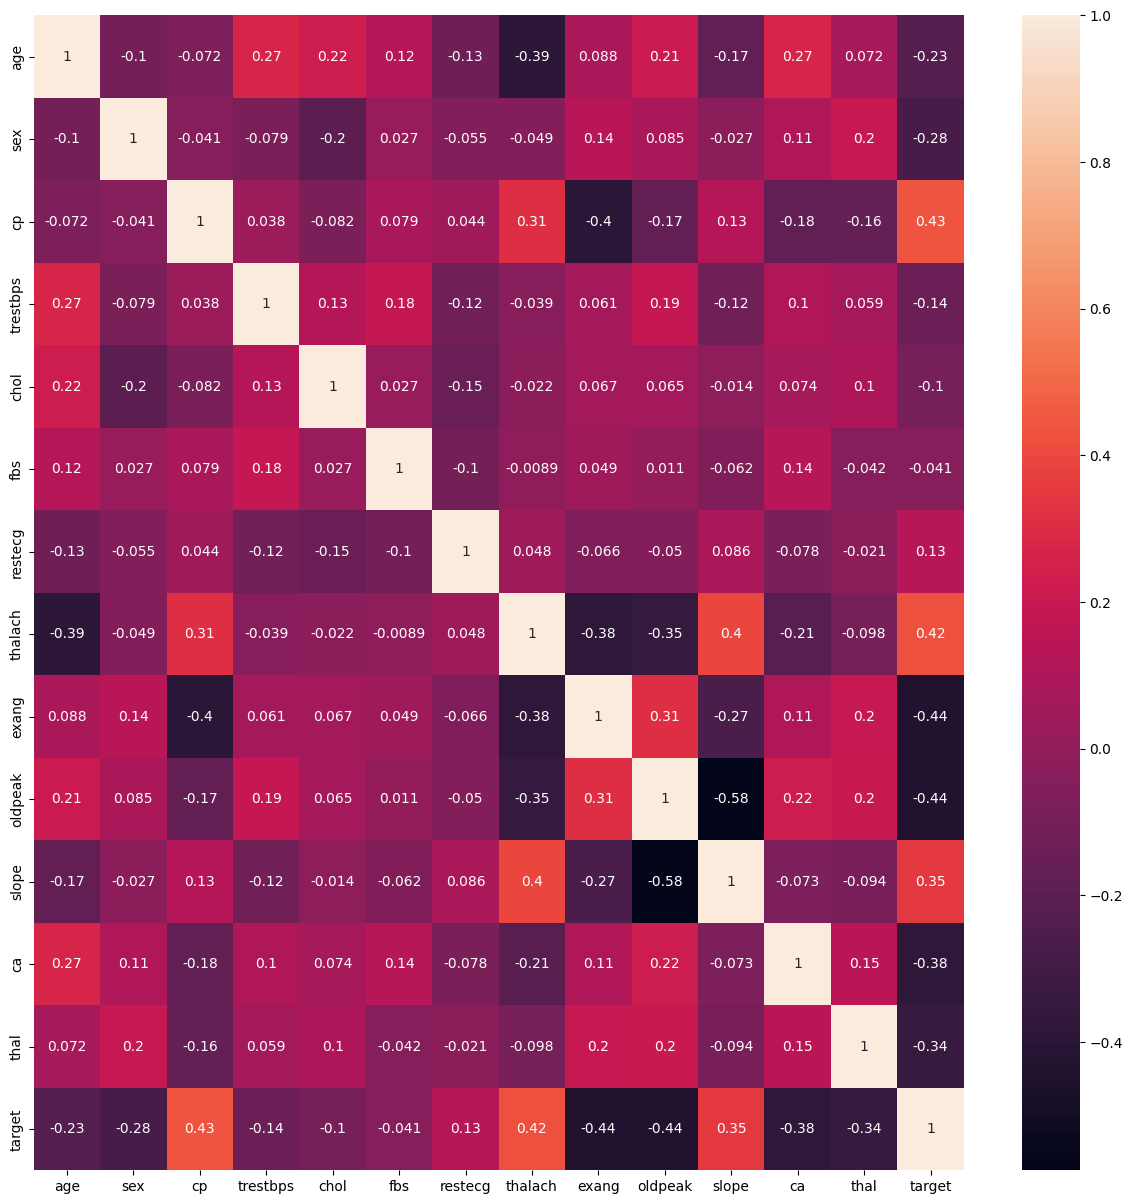

In [38]:
plt.figure(figsize=(15, 15))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

### Observing Numerical Datas for General Outliers Distribution

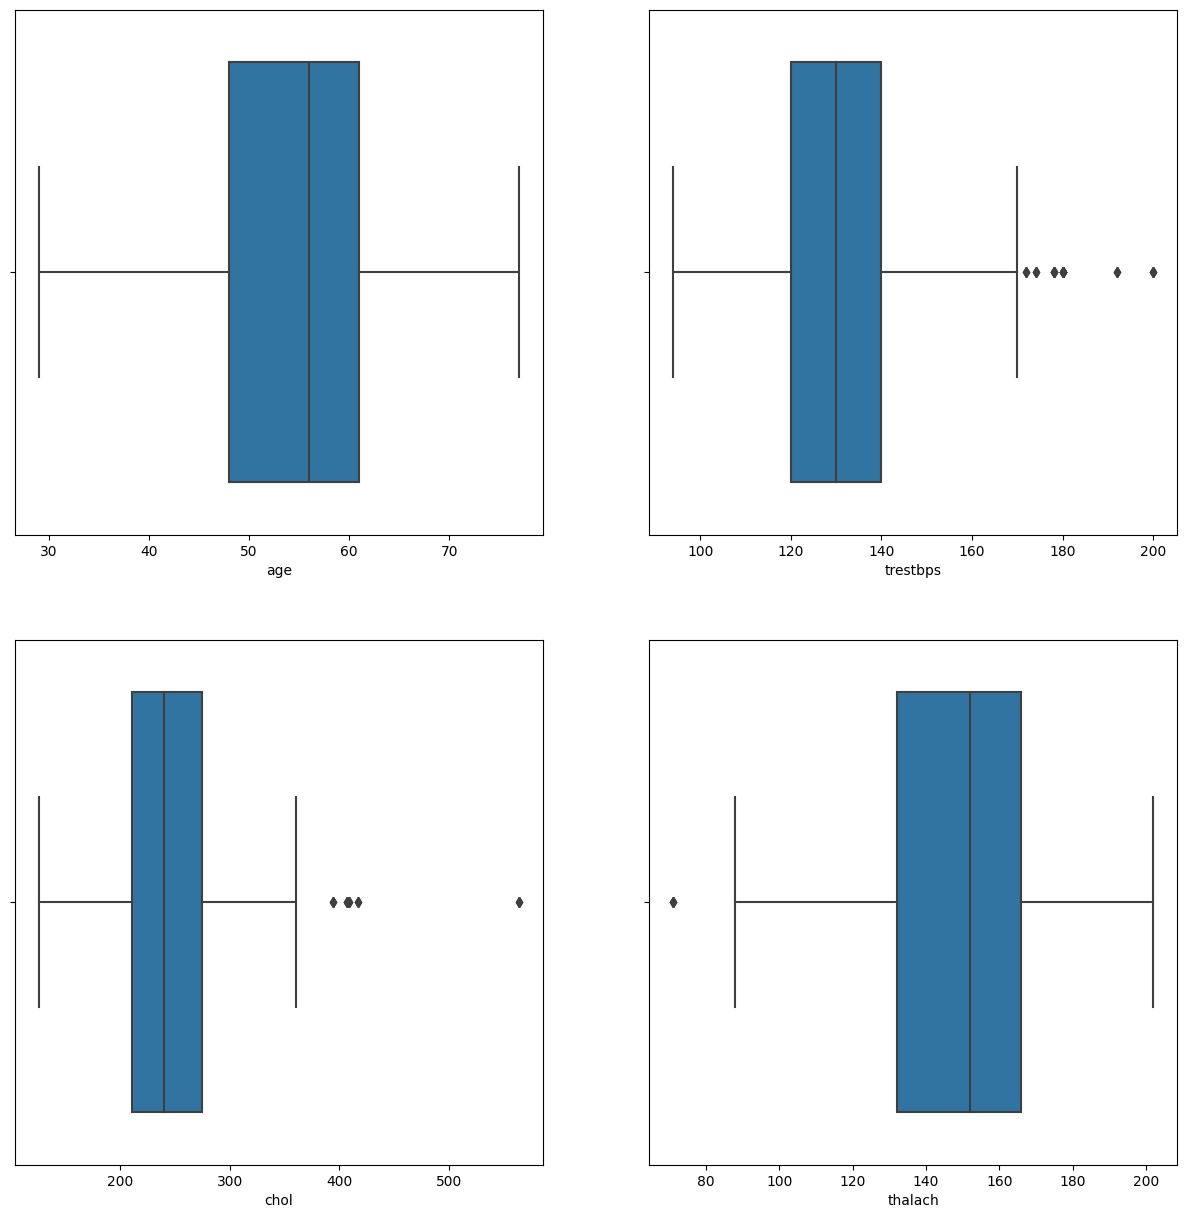

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(df, x=nums[k], ax=axes[i][j])
        k += 1
        
plt.show()

In [40]:
# Removing the outliers
def remove_outliers(df, x):
    perc = np.percentile(df[x], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    _min = perc[1] - iqr*1.5
    _max = perc[3] + iqr*1.5
    df.loc[df[x] < _min, x] = _min
    df.loc[df[x] > _max, x] = _max
    
    return df

In [41]:
for i in nums[1:]:
    df = remove_outliers(df, i)

In [42]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

### Training Model & Evaluation

In [43]:
def training(model, name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(pred, y_test)
    acc *= 100
    title = "{}: {}%".format(name, round(acc, 2))
    print(title)
    print()
    return model

In [44]:
abc = AdaBoostClassifier(learning_rate=0.1)
rfc = RandomForestClassifier(max_depth=50)
svc = SVC(C=0.8)
lgr = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
xgb = XGBClassifier()

models = [abc, rfc, svc, lgr, gnb, knn, xgb]

names = ['Ada Boost', 'Random Forest', 'SVC',
        'Logistic Regression', 'Naive Bayes', 'KNN',
        'XGB']

### Machine Learning Performance

In [45]:
trained = []
for i, j in zip(models, names):
    trained += [training(i, j)]

Ada Boost: 80.49%

Random Forest: 98.54%

SVC: 67.8%



C:\Users\gedes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 80.49%

Naive Bayes: 80.0%

KNN: 90.24%

XGB: 98.54%



In [46]:
mms = MinMaxScaler()
x_n = mms.fit_transform(x)
x_n = torch.tensor(x_n).type(torch.FloatTensor)
y_n = torch.tensor(y).type(torch.FloatTensor)

In [47]:
xn_train, xn_test, yn_train, yn_test = train_test_split(x_n, y_n, random_state=42, test_size=0.2)

### Deep Learning Model

In [48]:
class HeartClassifier(torch.nn.Module):
    def __init__(self, in_channels, num_classes):
        super(HeartClassifier, self).__init__()
        self.layer = torch.nn.Linear(in_channels, 64)
        self.layer1 = torch.nn.Linear(64, 128)
        self.layer2 = torch.nn.Linear(128, num_classes)
        
    def forward(self, x):
        x = self.layer(x)
        x = self.layer1(x)
        x = self.layer2(x)
        
        return torch.nn.functional.softmax(x, dim=1)

In [49]:
model = HeartClassifier(13, 2)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Deep Learning Performance & Evaluation

In [55]:
EPOCHS = 3000

train_history = []
val_history = []
acc_history = []

for i in range(1, EPOCHS+1):
    model.train()
    
    train_loss = 0
    
    optimizer.zero_grad()
    out = model(xn_train)
    loss = criterion(out, yn_train.long())
    if i%500 == 0:
        print("Epoch {} || train loss: {}".format(i, loss.item()/out.size(0)), end=' ')
    train_history += [loss.item()/out.size(0)]
    
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        out = model(xn_test)
        loss = criterion(out, yn_test.long())
        if i%500 == 0:
            print("|| val loss: {} || acc: {}".format(loss.item()/out.size(0), 
                                                      (out.argmax(1) == yn_test).sum().item()/out.size(0)))
            print()
        
    val_history += [loss.item()/out.size(0)]
    acc_history += [(out.argmax(1) == yn_test).sum().item()/out.size(0)]

Epoch 500 || train loss: 0.0004881051618878434 || val loss: 0.0022807066033526165 || acc: 0.848780487804878

Epoch 1000 || train loss: 0.00048759892219450414 || val loss: 0.0022796042081786364 || acc: 0.848780487804878

Epoch 1500 || train loss: 0.0004874075694781978 || val loss: 0.002279188138682668 || acc: 0.848780487804878

Epoch 2000 || train loss: 0.0004872689523347994 || val loss: 0.0022785013768731096 || acc: 0.848780487804878

Epoch 2500 || train loss: 0.000487140293528394 || val loss: 0.002277860699630365 || acc: 0.848780487804878

Epoch 3000 || train loss: 0.0004870206481072961 || val loss: 0.0022772685783665355 || acc: 0.848780487804878



Text(0.5, 1.0, 'Accuracy history')

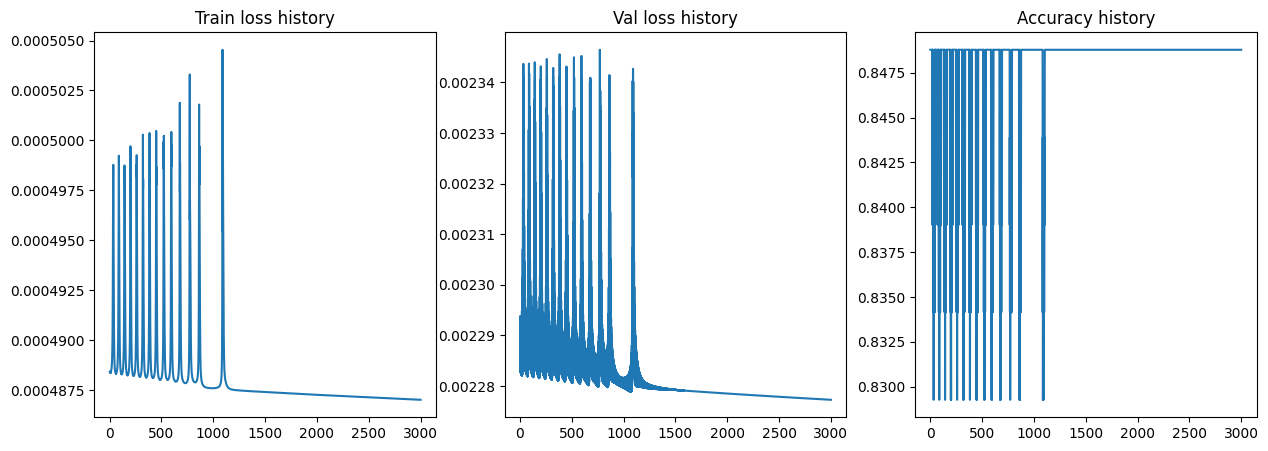

In [56]:
epochs = list(range(1, EPOCHS+1))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].plot(epochs, train_history)
axes[0].set_title("Train loss history")
axes[1].plot(epochs, val_history)
axes[1].set_title("Val loss history")
axes[2].plot(epochs, acc_history)
axes[2].set_title("Accuracy history")